## Project#3: Cat vs Dog Image Classifier

**Descripton:**Use a dataset containing images of cats and dogs to train a model to
distinguish between the two. This project further explores CNNs and teaches you about data
augmentation, a technique to increase the diversity of your training set by applying random
transformations.

In [13]:
!pip install tensorflow keras


**Importing Libraries**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/lastdata.zip'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/lastdata.zip -d /content/lastdata


Streaming output truncated to the last 5000 lines.
  inflating: /content/lastdata/lastdata/Dog/11484.jpg  
  inflating: /content/lastdata/lastdata/Dog/11485.jpg  
  inflating: /content/lastdata/lastdata/Dog/11486.jpg  
  inflating: /content/lastdata/lastdata/Dog/11487.jpg  
  inflating: /content/lastdata/lastdata/Dog/11488.jpg  
  inflating: /content/lastdata/lastdata/Dog/11489.jpg  
  inflating: /content/lastdata/lastdata/Dog/11490.jpg  
  inflating: /content/lastdata/lastdata/Dog/11491.jpg  
  inflating: /content/lastdata/lastdata/Dog/11492.jpg  
  inflating: /content/lastdata/lastdata/Dog/11493.jpg  
  inflating: /content/lastdata/lastdata/Dog/11494.jpg  
  inflating: /content/lastdata/lastdata/Dog/11495.jpg  
  inflating: /content/lastdata/lastdata/Dog/11496.jpg  
  inflating: /content/lastdata/lastdata/Dog/11497.jpg  
  inflating: /content/lastdata/lastdata/Dog/11498.jpg  
  inflating: /content/lastdata/lastdata/Dog/11499.jpg  
  inflating: /content/lastdata/lastdata/Dog/11500.jpg

## Verifying Data Presence

In [ ]:
import os

# Check the contents of the main dataset folder
print(os.listdir('/content/lastdata/lastdata'))

# Optionally, check the contents of specific folders like 'cats' or 'dogs' (adjust if needed)
print("Cats folder contents:", os.listdir('/content/lastdata/lastdata/Cat')[:5])  # Display first 5 images in the cats folder
print("Dogs folder contents:", os.listdir('/content/lastdata/lastdata/Dog')[:5])  # Display first 5 images in the dogs folder


['Cat', 'Dog']
Cats folder contents: ['11269.jpg', '8161.jpg', '10141.jpg', '9106.jpg', '12075.jpg']
Dogs folder contents: ['11269.jpg', '8161.jpg', '10141.jpg', '9106.jpg', '12075.jpg']


## Set up data generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators with data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values between 0 and 1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2      # 20% of data for validation
)

# Set the path to your dataset
data_dir = '/content/lastdata/lastdata'

# Image size and batch size
img_size = (128, 128)
batch_size = 32

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'         # Training subset
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'       # Validation subset
)


Found 10288 images belonging to 2 classes.
Found 2571 images belonging to 2 classes.


## Build CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [12]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/322 ━━━━━━━━━━━━━━━━━━━━ 1:04 1s/step - accuracy: 0.5125 - loss: 0.7355

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


322/322 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.5152 - loss: 0.7301 - val_accuracy: 0.5690 - val_loss: 0.6810
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.5565 - loss: 0.6838 - val_accuracy: 0.6025 - val_loss: 0.6696
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.5691 - loss: 0.6795 - val_accuracy: 0.5784 - val_loss: 0.6747
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.5885 - loss: 0.6742 - val_accuracy: 0.5928 - val_loss: 0.6631
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.6004 - loss: 0.6663 - val_accuracy: 0.6379 - val_loss: 0.6342
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.6477 - loss: 0.6358 - val_accuracy: 0.6881 - val_loss: 0.5916
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.6696 - loss: 0.6121 - val_accuracy: 0.6842 - val_loss: 0.5867
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.6598 - loss: 0.6123 - val_accuracy: 0.697

## Training and Validation Curves

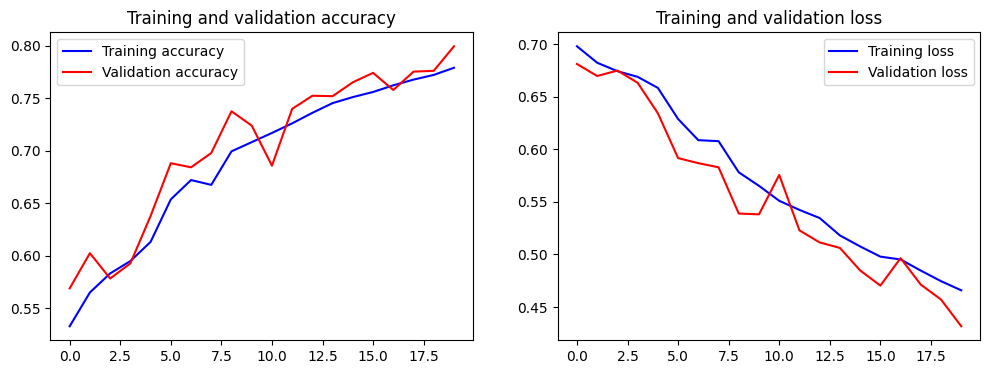

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## Upload Image

In [30]:
from google.colab import files
uploaded = files.upload()  # Choose an image file from your local system


Saving cat.jpg to cat (2).jpg


## Preprocess image

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'cat.jpg'  # Update with your image filename
img = image.load_img(img_path, target_size=(128, 128))  # Ensure it matches model input size (128, 128)

# Preprocess the image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values as during training


## Test Image

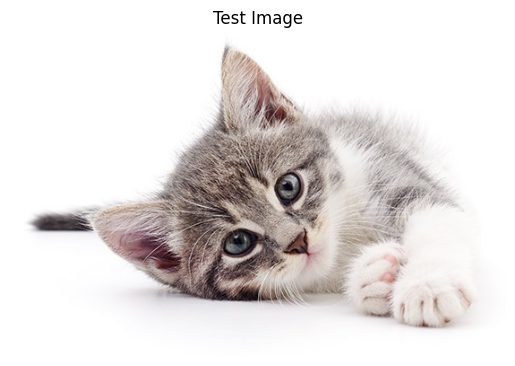

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.axis('off')
plt.show()


## Make prediction

In [33]:
# Make a prediction
prediction = model.predict(img_array)

# Interpret the result
if prediction[0][0] > 0.5:  # Assuming threshold of 0.5
    print("The model predicts: Dog")
else:
    print("The model predicts: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The model predicts: Cat
